/Users/yfujii/work/COMET/data/NeutronSim/neuAna_monList2_0.root
1619750
/Users/yfujii/work/COMET/data/NeutronSim/neuAna_monList2_1.root
1612206
/Users/yfujii/work/COMET/data/NeutronSim/neuAna_monList2_2.root
1610645
/Users/yfujii/work/COMET/data/NeutronSim/neuAna_monList2_3.root
1629320
/Users/yfujii/work/COMET/data/NeutronSim/neuAna_monList2_4.root
1621258
total simulated protons =  990678400.0
beam rate in Phase-I    =  2496603629784.305  [Hz]


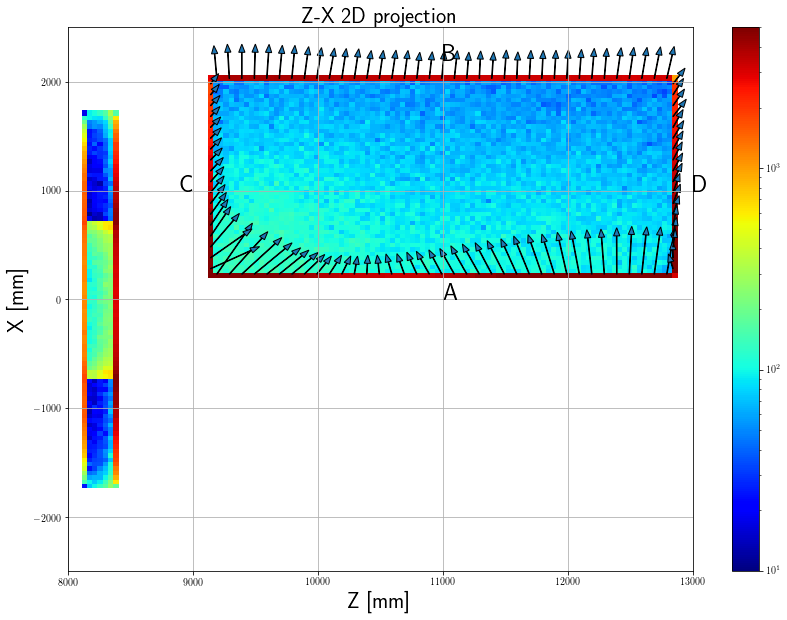

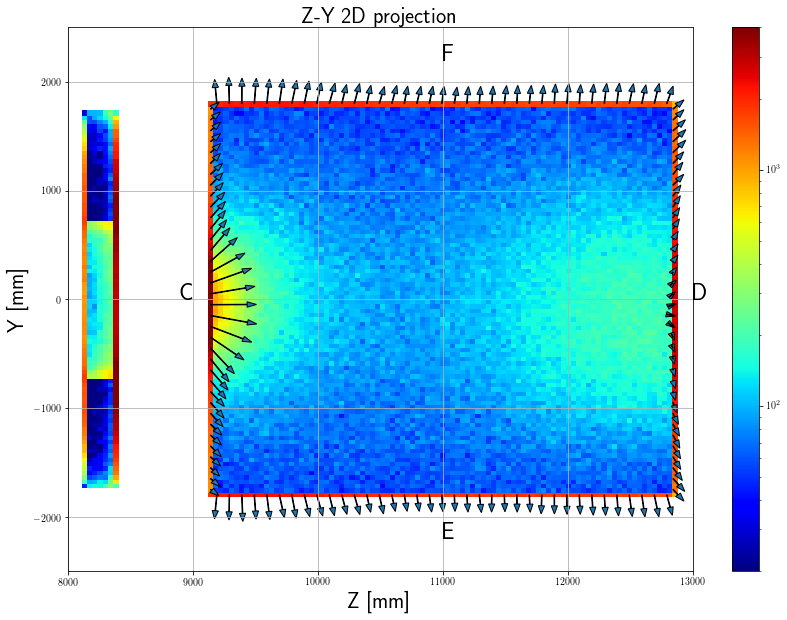

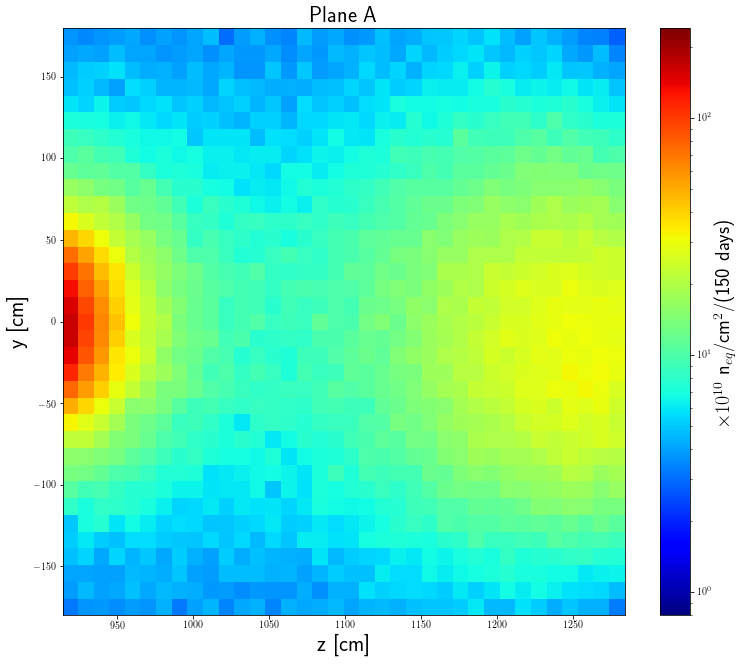

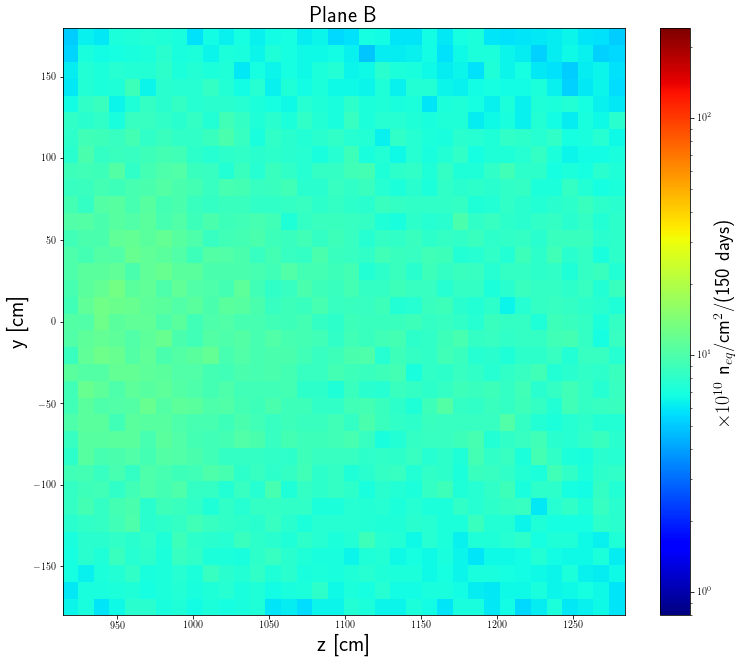

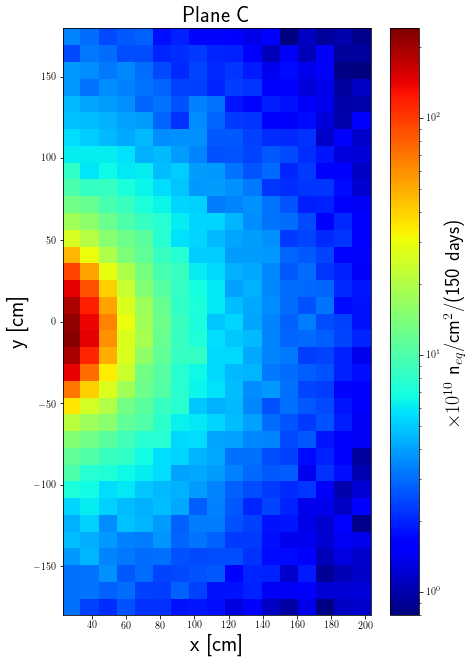

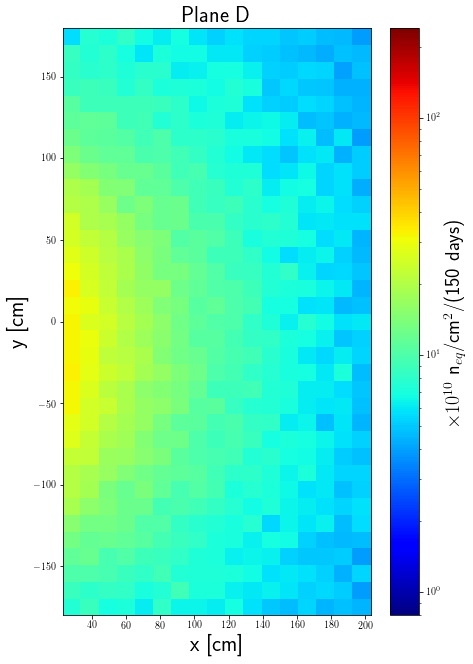

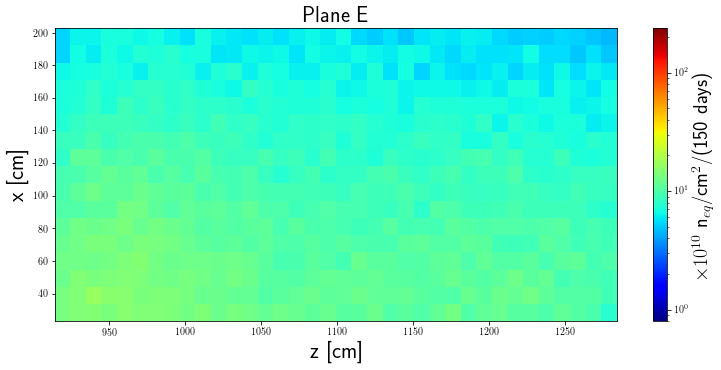

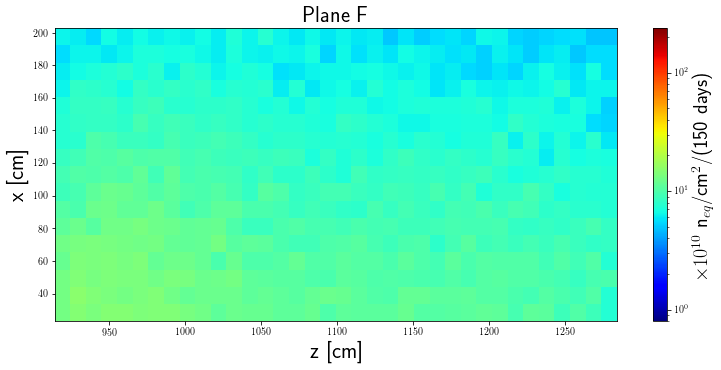

In [30]:
import uproot

import numpy as np

import math

import matplotlib
matplotlib.rcParams['text.usetex'] = True

import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

from scipy import stats


#### GeDet geometrical information
# Main container (for RooTracker walls and also the HPGeContainer)
#/comet/GeDetector/Dimension Height = 1800*mm
#/comet/GeDetector/Dimension Width = 1850*mm
#/comet/GeDetector/Dimension Length = 900*mm
#/comet/Position  GeDetector:Position = (6400*mm, 0, 7650.*mm) + (3912.7*mm, 0, -831.2*mm) + (680,0,-300)
#/comet/Rotation  GeDetector:Rotation = (axis=(0, 1, 0), angle=0*deg)
posGeZ=6400.0+3912.7+680.0 # globalX = z
posGeX=831.2+300.0 # 7650-globalZ = x has been already subtracted
zedge=[posGeZ-1850.0,posGeZ+1850.0]
xedge=[posGeX- 900.0,posGeX+ 900.0]
yedge=[-1800.0,1800.0]


def get_plane(x,y,z):
    idx=-1
    if   (x<xedge[0]+0.5001) and (y>yedge[0] and y<yedge[1] and z>zedge[0] and z<zedge[1]): idx=0
    elif (x>xedge[1]-0.5001) and (y>yedge[0] and y<yedge[1] and z>zedge[0] and z<zedge[1]): idx=1
    elif (z<zedge[0]+0.5001) and (x>xedge[0] and x<xedge[1] and y>yedge[0] and y<yedge[1]): idx=2
    elif (z>zedge[1]-0.5001) and (x>xedge[0] and x<xedge[1] and y>yedge[0] and y<yedge[1]): idx=3
    elif (y<yedge[0]+0.5001) and (x>xedge[0] and x<xedge[1] and z>zedge[0] and z<zedge[1]): idx=4
    elif (y>yedge[1]-0.5001) and (x>xedge[0] and x<xedge[1] and z>zedge[0] and z<zedge[1]): idx=5
    return idx

def get_monName(mId):
    switcher = {
        0: 'CDCReadoutRegionMonitor',
        1: 'CTHReadoutRegionMonitor',
        2: 'DetectorSolenoidIronYokeDetEPDS',
        3: 'DetectorSolenoidDSBeamDumpNeutronShield_1',
        4: 'DetectorSolenoidDSBeamDumpNeutronShield_2',
        5: 'DetectorSolenoidDSBeamDumpNeutronShield_3',
        6: 'DetectorSolenoidDSBeamDumpNeutronShield_4',
        7: 'BridgeSolenoidBSCryoOuter_2',
        8: 'GeDetectorRooTracker',
    }
    return switcher.get(mId,'nothing')

dataDir="/Users/yfujii/work/COMET/data/NeutronSim/"
nInputFile=5
#nInputFile=3
offset=0
fileList=[]


#### Input files
for i in range(offset,offset+nInputFile,1):
    num=str(i)
    fileList.append(dataDir+"neuAna_monList2_"+num+".root")


posx=np.array([])
posy=np.array([])
posz=np.array([])
momx=np.array([])
momy=np.array([])
momz=np.array([])
wsel=np.array([])
msel=np.array([])

fRate=1.0
fPOT =0.0
for ifile in range(len(fileList)):
    print(fileList[ifile])
    totPOT   = uproot.open(fileList[ifile])["totPOT"]
    beamRate = uproot.open(fileList[ifile])["protonRate"]
    fPOT = fPOT+float(totPOT._fVal)
    fRate= float(beamRate._fVal)
    #print(fPOT)
    #print(fRate)
    tree  = uproot.open(fileList[ifile])["otree"]
    #tree.show()
    mId, weight, pos, mom = tree.arrays(["mId", "weight", "pos", "mom"], outputtype=tuple)
    print(tree.numentries)
    #print(pos)
    #### DetectorSolenoidIronYokeDetEPDS
    posx=np.append(posx,pos[mId==2].x)
    posy=np.append(posy,pos[mId==2].y)
    posz=np.append(posz,pos[mId==2].z)
    momx=np.append(momx,mom[mId==2].x)
    momy=np.append(momy,mom[mId==2].y)
    momz=np.append(momz,mom[mId==2].z)
    wsel=np.append(wsel,weight[mId==2])
    msel=np.append(msel,mId[mId==2])
    #### GeDetectorRooTracker
    posx=np.append(posx,pos[mId==8].x)
    posy=np.append(posy,pos[mId==8].y)
    posz=np.append(posz,pos[mId==8].z)
    momx=np.append(momx,mom[mId==8].x)
    momy=np.append(momy,mom[mId==8].y)
    momz=np.append(momz,mom[mId==8].z)
    wsel=np.append(wsel,weight[mId==8])
    msel=np.append(msel,mId[mId==8])

print("total simulated protons = ",fPOT)
print("beam rate in Phase-I    = ",fRate," [Hz]")
scale=(fRate/fPOT)*3600.*24.*150./1e10/100.0 # from sec to 150days, 10cm x 10cm binning



#### plane-by-plane values for GeDet monitor
posx2=[[],[],[],[],[],[]]
posy2=[[],[],[],[],[],[]]
posz2=[[],[],[],[],[],[]]
wsel2=[[],[],[],[],[],[]]

nbinsX=int((xedge[1]-xedge[0])/100.)
nbinsY=int((yedge[1]-yedge[0])/100.)
nbinsZ=int((zedge[1]-zedge[0])/100.)
#### average momentum at each bin on each plane
momx2=[np.zeros(nbinsZ),np.zeros(nbinsY),
       np.zeros(nbinsZ),np.zeros(nbinsY),
       np.zeros(nbinsX),np.zeros(nbinsY),
       np.zeros(nbinsX),np.zeros(nbinsY),
       np.zeros(nbinsZ),np.zeros(nbinsX),
       np.zeros(nbinsZ),np.zeros(nbinsX)]
momy2=[np.zeros(nbinsZ),np.zeros(nbinsY),
       np.zeros(nbinsZ),np.zeros(nbinsY),
       np.zeros(nbinsX),np.zeros(nbinsY),
       np.zeros(nbinsX),np.zeros(nbinsY),
       np.zeros(nbinsZ),np.zeros(nbinsX),
       np.zeros(nbinsZ),np.zeros(nbinsX)]
momz2=[np.zeros(nbinsZ),np.zeros(nbinsY),
       np.zeros(nbinsZ),np.zeros(nbinsY),
       np.zeros(nbinsX),np.zeros(nbinsY),
       np.zeros(nbinsX),np.zeros(nbinsY),
       np.zeros(nbinsZ),np.zeros(nbinsX),
       np.zeros(nbinsZ),np.zeros(nbinsX)]
nhits=[np.zeros(nbinsZ),np.zeros(nbinsY),
       np.zeros(nbinsZ),np.zeros(nbinsY),
       np.zeros(nbinsX),np.zeros(nbinsY),
       np.zeros(nbinsX),np.zeros(nbinsY),
       np.zeros(nbinsZ),np.zeros(nbinsX),
       np.zeros(nbinsZ),np.zeros(nbinsX)]

def get_axisbin(idx,posX,posY,posZ):
    bin1=-1
    bin2=-1
    if (idx<2):
        bin1=math.floor((posZ-zedge[0])/100.)
        bin2=math.floor((posY-yedge[0])/100.)
    elif (idx<4):
        bin1=math.floor((posX-xedge[0])/100.)
        bin2=math.floor((posY-yedge[0])/100.)
    elif (idx<6):
        bin1=math.floor((posZ-zedge[0])/100.)
        bin2=math.floor((posX-xedge[0])/100.)
    return bin1,bin2

for ihit in range(len(wsel)):
    if msel[ihit]==2: continue
    idx=get_plane(posx[ihit],posy[ihit],posz[ihit])
    if idx==-1: continue
    posx2[idx].append(posx[ihit]/10.0) # mm->cm
    posy2[idx].append(posy[ihit]/10.0) # mm->cm
    posz2[idx].append(posz[ihit]/10.0) # mm->cm
    wsel2[idx].append(wsel[ihit]*scale)
    bin1,bin2=get_axisbin(idx,posx[ihit],posy[ihit],posz[ihit])
    #print(idx," ",bin1," ",bin2," ",posx[ihit]," ",posy[ihit]," ",posz[ihit])
    momx2[2*idx+0][bin1]=momx2[2*idx+0][bin1]+momx[ihit]*wsel[ihit]
    momx2[2*idx+1][bin2]=momx2[2*idx+1][bin2]+momx[ihit]*wsel[ihit]
    momy2[2*idx+0][bin1]=momy2[2*idx+0][bin1]+momy[ihit]*wsel[ihit]
    momy2[2*idx+1][bin2]=momy2[2*idx+1][bin2]+momy[ihit]*wsel[ihit]
    momz2[2*idx+0][bin1]=momz2[2*idx+0][bin1]+momz[ihit]*wsel[ihit]
    momz2[2*idx+1][bin2]=momz2[2*idx+1][bin2]+momz[ihit]*wsel[ihit]
    nhits[2*idx+0][bin1]=nhits[2*idx+0][bin1]+1
    nhits[2*idx+1][bin2]=nhits[2*idx+1][bin2]+1

### calculate momentum average??
for iplane in range(12):
    momx2[iplane] = momx2[iplane]/nhits[iplane]*10 # x10 arbitrary scaled
    momy2[iplane] = momy2[iplane]/nhits[iplane]*10 # x10 arbitrary scaled
    momz2[iplane] = momz2[iplane]/nhits[iplane]*10 # x10 arbitrary scaled

x_bins = [np.linspace(zedge[0]/10.,zedge[1]/10.,nbinsZ),
          np.linspace(zedge[0]/10.,zedge[1]/10.,nbinsZ),
          np.linspace(xedge[0]/10.,xedge[1]/10.,nbinsX),
          np.linspace(xedge[0]/10.,xedge[1]/10.,nbinsX),
          np.linspace(zedge[0]/10.,zedge[1]/10.,nbinsZ),
          np.linspace(zedge[0]/10.,zedge[1]/10.,nbinsZ)]
y_bins = [np.linspace(yedge[0]/10.,yedge[1]/10.,nbinsY),
          np.linspace(yedge[0]/10.,yedge[1]/10.,nbinsY),
          np.linspace(yedge[0]/10.,yedge[1]/10.,nbinsY),
          np.linspace(yedge[0]/10.,yedge[1]/10.,nbinsY),
          np.linspace(xedge[0]/10.,xedge[1]/10.,nbinsX),
          np.linspace(xedge[0]/10.,xedge[1]/10.,nbinsX)]

plt.figure(figsize=(14.0,10.0))
x_bins2 = np.linspace( 8000, 13000,125)
y_bins2 = np.linspace(-2500,  2500,125)
plt.hist2d(posz,posx,bins=[x_bins2,y_bins2],weights=wsel,cmap=plt.cm.jet,norm=LogNorm(1e1,5e3))
plt.grid(True)
plt.title('Z-X 2D projection', size=22)
plt.xlim( 8000,13000)
plt.ylim(-2500, 2500)
plt.text(11000,    0, 'A', size=24)
plt.text(11000, 2200, 'B', size=24)
plt.text( 8900, 1000, 'C', size=24)
plt.text(13000, 1000, 'D', size=24)
### draw vectors
for ipl in range(4):
    if (ipl<2):
        for ibin in range(len(momx2[2*ipl+0])):
            plt.arrow(zedge[0]+(ibin+0.5)*100,xedge[ipl%2],
                      momz2[2*ipl+0][ibin],momx2[2*ipl+0][ibin],
                      width=5,head_width=50,
                      length_includes_head=True)
    else:
        for ibin in range(len(momx2[2*ipl+0])):
            plt.arrow(zedge[ipl%2],xedge[0]+(ibin+0.5)*100,
                      momz2[2*ipl+0][ibin],momx2[2*ipl+0][ibin],
                      width=5,head_width=50,
                      length_includes_head=True)
plt.ylabel('X [mm]', size=22)
plt.xlabel('Z [mm]', size=22)
plt.colorbar()
plt.show()

plt.figure(figsize=(14.0,10.0))
x_bins2 = np.linspace( 8000,13000,125)
y_bins2 = np.linspace(-2500, 2500,125)
plt.hist2d(posz,posy,bins=[x_bins2,y_bins2],weights=wsel,cmap=plt.cm.jet,norm=LogNorm(2e1,4e3))
plt.grid(True)
plt.title('Z-Y 2D projection', size=22)
plt.xlim( 8000,13000)
plt.ylim(-2500, 2500)
plt.text( 8900,    0, 'C', size=24)
plt.text(13000,    0, 'D', size=24)
plt.text(11000,-2200, 'E', size=24)
plt.text(11000, 2200, 'F', size=24)
for ipl in range(2,6):
    if (ipl<4):
        for ibin in range(len(momx2[2*ipl+1])):
            plt.arrow(zedge[ipl%2],yedge[0]+(ibin+0.5)*100,
                      momz2[2*ipl+1][ibin],momy2[2*ipl+1][ibin],
                      width=5,head_width=50,
                      length_includes_head=True)
    else:
        for ibin in range(len(momx2[2*ipl+0])):
            plt.arrow(zedge[0]+(ibin+0.5)*100,yedge[ipl%2],
                      momz2[2*ipl+0][ibin],momy2[2*ipl+0][ibin],
                      width=5,head_width=50,
                      length_includes_head=True)
plt.ylabel('Y [mm]', size=22)
plt.xlabel('Z [mm]', size=22)
plt.colorbar()
plt.show()

### ratio of x-y-z
rz=1.85
rx=0.9
ry=1.8
figRatio=[[rz,ry],[rz,ry],
          [rx,ry],[rx,ry],
          [rz,rx],[rz,rx]]
axLabel=[['z [cm]','y [cm]'],['z [cm]','y [cm]'],
         ['x [cm]','y [cm]'],['x [cm]','y [cm]'],
         ['z [cm]','x [cm]'],['z [cm]','x [cm]'],]
monName=['Plane A','Plane B','Plane C','Plane D',
         'Plane E','Plane F']
for iplane in range(6):
    plt.figure(figsize=(figRatio[iplane][0]*6+1.5,figRatio[iplane][1]*6))
    tmpx=[]
    tmpy=[]
    if (iplane<2):
        tmpx,tmpy=posz2[iplane],posy2[iplane]
        plt.xlim(zedge[0]/10.,zedge[1]/10.)
        plt.ylim(yedge[0]/10.,yedge[1]/10.)
    elif (iplane<4):
        tmpx,tmpy=posx2[iplane],posy2[iplane]
        plt.xlim(xedge[0]/10.,xedge[1]/10.)
        plt.ylim(yedge[0]/10.,yedge[1]/10.)
    else:
        tmpx,tmpy=posz2[iplane],posx2[iplane]
        plt.xlim(zedge[0]/10.,zedge[1]/10.)
        plt.ylim(xedge[0]/10.,xedge[1]/10.)
    plt.title(monName[iplane], size=22)
    plt.hist2d(tmpx,tmpy,bins=[x_bins[iplane],y_bins[iplane]],weights=wsel2[iplane],
               cmap=plt.cm.jet,norm=LogNorm(0.8,2.4e2))#,norm=LogNorm())
    plt.xlabel(axLabel[iplane][0], size=22)
    plt.ylabel(axLabel[iplane][1], size=22)
    #plt.zlabel('')
    cbar=plt.colorbar()
    cbar.set_label(r'$\times10^{10}$ n$_{eq}$/cm$^{2}$/(150 days)', size=20)
    plt.show()
